In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
#plt.rcParams['figure.figsize'] = (15.0,7.0)

In [3]:
wine_original = pd.read_csv('winequality-red.csv',sep=';')
print(wine_original.shape)
wine_original.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_original.isnull().sum().sum()

0

In [5]:
wine_original.skew().sort_values()

density                 0.071288
pH                      0.193683
quality                 0.217802
citric acid             0.318337
volatile acidity        0.671593
alcohol                 0.860829
fixed acidity           0.982751
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
residual sugar          4.540655
chlorides               5.680347
dtype: float64

In [6]:
wine_original.columns[(wine_original.skew()>1.96) | (wine_original.skew()<-1.96)]

Index(['residual sugar', 'chlorides', 'sulphates'], dtype='object')

In [7]:
wine_original[['residual sugar', 'chlorides', 'sulphates']].describe(percentiles=[.05,.25,.5,.75,.95,.98,.985,.997])

,residual sugar,chlorides,sulphates
count,1599.000000,1599.000000,1599.000000
mean,2.538806,0.087467,0.658149
std,1.409928,0.047065,0.169507
min,0.900000,0.012000,0.330000
5%,1.590000,0.054000,0.470000
25%,1.900000,0.070000,0.550000
50%,2.200000,0.079000,0.620000
75%,2.600000,0.090000,0.730000
95%,5.100000,0.126100,0.930000
98%,6.604000,0.226000,1.130000


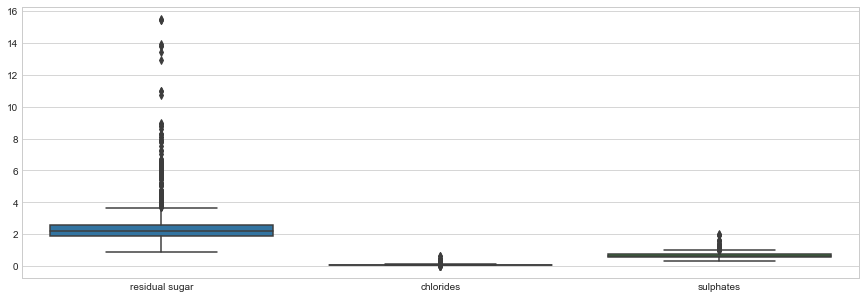

In [8]:
plt.rcParams['figure.figsize'] = (15.0,5.0)
sns.boxplot(data=wine_original[['residual sugar', 'chlorides', 'sulphates']])

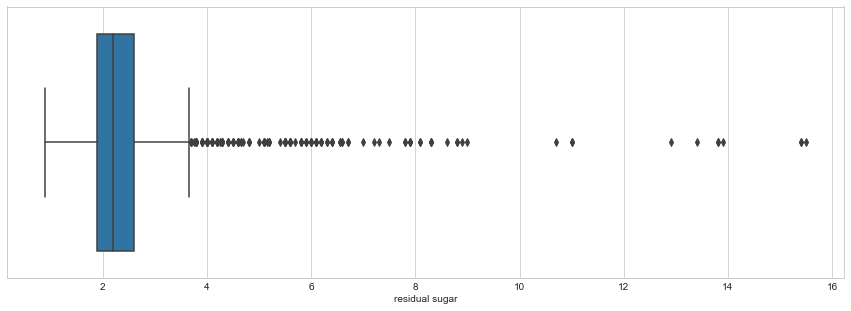

In [9]:
plt.rcParams['figure.figsize'] = (15.0,5.0)
sns.boxplot(wine_original['residual sugar'])

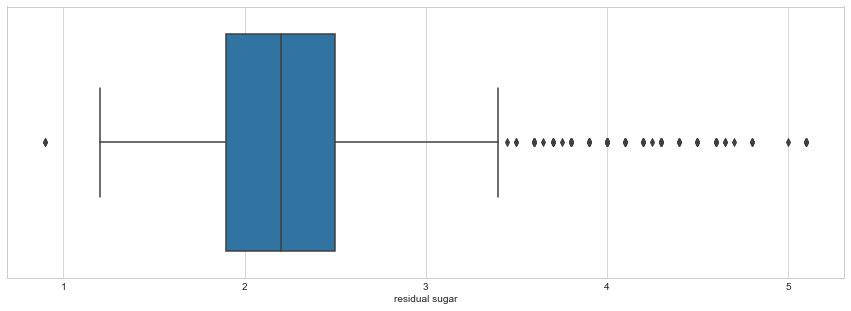

In [10]:
# removing outliers
wine_original = wine_original[wine_original['residual sugar']<=5.100000]
sns.boxplot(wine_original['residual sugar'])

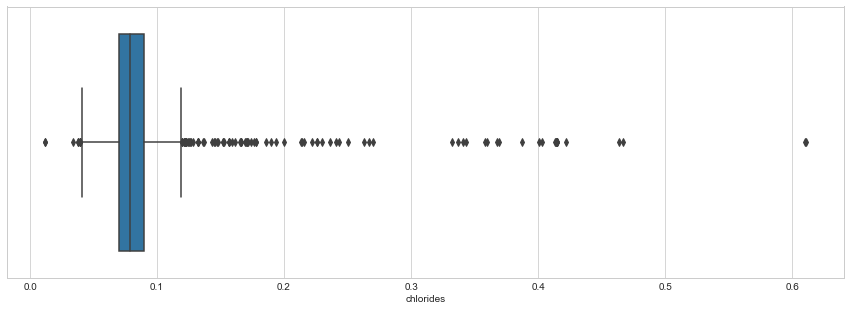

In [11]:
plt.rcParams['figure.figsize'] = (15.0,5.0)
sns.boxplot(wine_original['chlorides'])

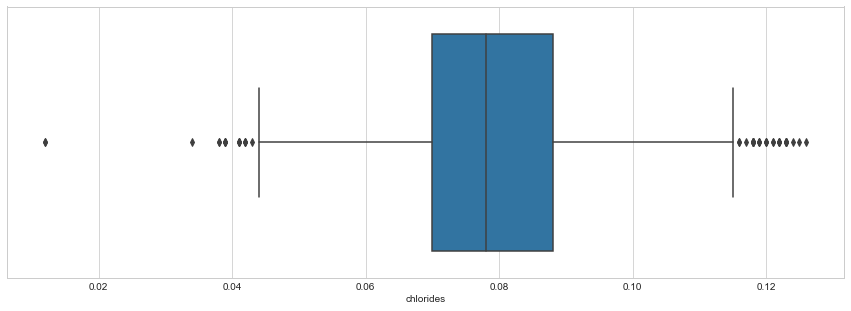

In [12]:
wine_original = wine_original[wine_original['chlorides']<=0.126100]
sns.boxplot(wine_original['chlorides'])

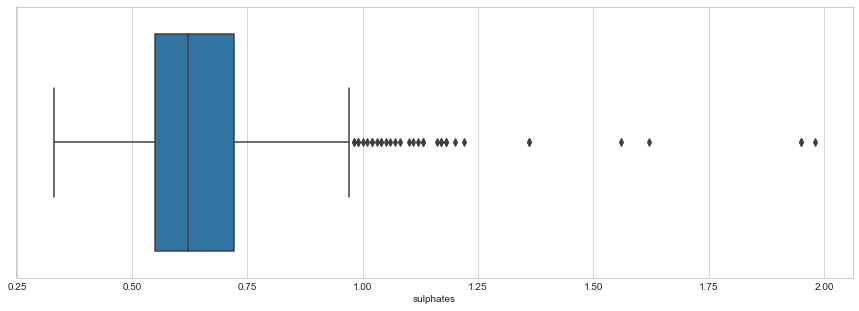

In [13]:
plt.rcParams['figure.figsize'] = (15.0,5.0)
sns.boxplot(wine_original['sulphates'])

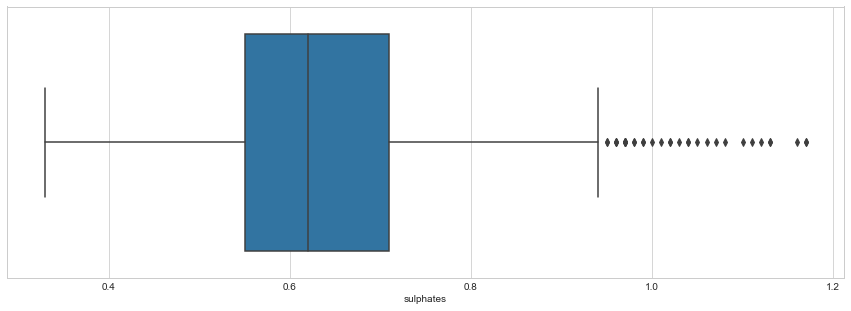

In [14]:
wine_original = wine_original[wine_original['sulphates']<=1.170000]
sns.boxplot(wine_original['sulphates'])

In [15]:
wine_original.skew().sort_values()

density                -0.020673
chlorides               0.150836
pH                      0.274662
quality                 0.284641
citric acid             0.314556
volatile acidity        0.564643
alcohol                 0.831746
sulphates               0.902584
fixed acidity           0.992284
free sulfur dioxide     1.025451
total sulfur dioxide    1.235438
residual sugar          1.629350
dtype: float64

In [16]:
wine_original.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
set(wine_original['quality'])

{3, 4, 5, 6, 7, 8}

In [18]:
X = wine_original.drop('quality',axis=1).values
y = wine_original.quality.values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
minmax = MinMaxScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

In [23]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ga = GaussianNB()
br = BernoulliNB()
ml = MultinomialNB()

In [24]:
ga.fit(X_train_scaled,y_train)
br.fit(X_train_scaled,y_train)
ml.fit(X_train_minmax,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
y_pred_train_ga = ga.predict(X_train_scaled)
y_pred_train_br = br.predict(X_train_scaled)
y_pred_train_ml = ml.predict(X_train_minmax)

In [26]:
y_pred_test_ga = ga.predict(X_test_scaled)
y_pred_test_br = br.predict(X_test_scaled)
y_pred_test_ml = ml.predict(X_test_minmax)

## Gaussian

## TrainData

In [27]:
print('Accuracy_Score: ',accuracy_score(y_train,y_pred_train_ga))
print()
print(confusion_matrix(y_train,y_pred_train_ga))
print()
print(classification_report(y_train,y_pred_train_ga))

Accuracy_Score:  0.5836653386454184

[[  2   1   0   1   0   0]
 [  0  14  15   6   0   0]
 [  1  19 302  89   7   1]
 [  0  11 138 189  65   6]
 [  0   1   8  36  77   5]
 [  0   0   0   2   6   2]]

              precision    recall  f1-score   support

           3       0.67      0.50      0.57         4
           4       0.30      0.40      0.35        35
           5       0.65      0.72      0.68       419
           6       0.59      0.46      0.52       409
           7       0.50      0.61      0.55       127
           8       0.14      0.20      0.17        10

    accuracy                           0.58      1004
   macro avg       0.47      0.48      0.47      1004
weighted avg       0.59      0.58      0.58      1004



## TestData

In [28]:
print('Accuracy_Score: ',accuracy_score(y_test,y_pred_test_ga))
print()
print(confusion_matrix(y_test,y_pred_test_ga))
print()
print(classification_report(y_test,y_pred_test_ga))

Accuracy_Score:  0.5406032482598608

[[  0   1   0   0   0   0]
 [  0   2   6   3   0   1]
 [  1   9 129  42   5   0]
 [  0   6  55  80  28   8]
 [  0   0   3  20  21   5]
 [  0   0   0   1   4   1]]

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.17      0.13        12
           5       0.67      0.69      0.68       186
           6       0.55      0.45      0.50       177
           7       0.36      0.43      0.39        49
           8       0.07      0.17      0.10         6

    accuracy                           0.54       431
   macro avg       0.29      0.32      0.30       431
weighted avg       0.56      0.54      0.55       431



## Bernouli's

## Train data

In [29]:
print('Accuracy_Score: ',accuracy_score(y_train,y_pred_train_br))
print()
print(confusion_matrix(y_train,y_pred_train_br))
print()
print(classification_report(y_train,y_pred_train_br))

Accuracy_Score:  0.5776892430278885

[[  0   0   3   1   0   0]
 [  0   0  21  14   0   0]
 [  0   4 290 112  13   0]
 [  0   2 120 219  68   0]
 [  0   4   5  47  71   0]
 [  0   0   0   5   5   0]]

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        35
           5       0.66      0.69      0.68       419
           6       0.55      0.54      0.54       409
           7       0.45      0.56      0.50       127
           8       0.00      0.00      0.00        10

    accuracy                           0.58      1004
   macro avg       0.28      0.30      0.29      1004
weighted avg       0.56      0.58      0.57      1004



## TestData

In [30]:
print('Accuracy_Score: ',accuracy_score(y_test,y_pred_test_br))
print()
print(confusion_matrix(y_test,y_pred_test_br))
print()
print(classification_report(y_test,y_pred_test_br))

Accuracy_Score:  0.5730858468677494

[[  0   0   1   0   0   0]
 [  0   1   7   4   0   0]
 [  0   0 130  49   7   0]
 [  0   3  56  92  26   0]
 [  0   0   2  23  24   0]
 [  0   0   0   2   4   0]]

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.08      0.12        12
           5       0.66      0.70      0.68       186
           6       0.54      0.52      0.53       177
           7       0.39      0.49      0.44        49
           8       0.00      0.00      0.00         6

    accuracy                           0.57       431
   macro avg       0.31      0.30      0.30       431
weighted avg       0.56      0.57      0.56       431



## Multinomial

## TrainData

In [31]:
print('Accuracy_Score: ',accuracy_score(y_train,y_pred_train_ml))
print()
print(confusion_matrix(y_train,y_pred_train_ml))
print()
print(classification_report(y_train,y_pred_train_ml))

Accuracy_Score:  0.5657370517928287

[[  0   0   4   0   0   0]
 [  0   0  24  11   0   0]
 [  0   0 321  98   0   0]
 [  0   0 162 247   0   0]
 [  0   0  11 116   0   0]
 [  0   0   0  10   0   0]]

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        35
           5       0.61      0.77      0.68       419
           6       0.51      0.60      0.55       409
           7       0.00      0.00      0.00       127
           8       0.00      0.00      0.00        10

    accuracy                           0.57      1004
   macro avg       0.19      0.23      0.21      1004
weighted avg       0.47      0.57      0.51      1004



## TestData

In [32]:
print('Accuracy_Score: ',accuracy_score(y_test,y_pred_test_ml))
print()
print(confusion_matrix(y_test,y_pred_test_ml))
print()
print(classification_report(y_test,y_pred_test_ml))

Accuracy_Score:  0.6009280742459396

[[  0   0   1   0   0   0]
 [  0   0   8   4   0   0]
 [  0   0 150  36   0   0]
 [  0   0  68 109   0   0]
 [  0   0   4  45   0   0]
 [  0   0   0   6   0   0]]

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        12
           5       0.65      0.81      0.72       186
           6       0.55      0.62      0.58       177
           7       0.00      0.00      0.00        49
           8       0.00      0.00      0.00         6

    accuracy                           0.60       431
   macro avg       0.20      0.24      0.22       431
weighted avg       0.50      0.60      0.55       431



## Divide quality as low, medium, high

In [33]:
wine_ql = pd.read_csv('winequality-red.csv',sep=';')
print(wine_ql.shape)
wine_ql.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
set(wine_ql['quality'])

{3, 4, 5, 6, 7, 8}

In [35]:
wine_ql['new'] = wine_ql['quality'].map({3:'low',4:'low',5:'low',6:'medium',7:'high',8:'high'}) # or use lambda

In [36]:
wine_ql.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [37]:
wine_ql['new'].value_counts()

low       744
medium    638
high      217
Name: new, dtype: int64

In [38]:
wine_ql.drop('quality',axis=1,inplace=True)

In [39]:
X = wine_ql.drop('new',axis=1).values
y = wine_ql.new.values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

In [42]:
ga.fit(X_train_scaled,y_train)
br.fit(X_train_scaled,y_train)
ml.fit(X_train_minmax,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
y_pred_train_ga = ga.predict(X_train_scaled)
y_pred_train_br = br.predict(X_train_scaled)
y_pred_train_ml = ml.predict(X_train_minmax)

y_pred_test_ga = ga.predict(X_test_scaled)
y_pred_test_br = br.predict(X_test_scaled)
y_pred_test_ml = ml.predict(X_test_minmax)

## Gaussian

## TrainData

In [44]:
print('Accuracy_Score: ',accuracy_score(y_train,y_pred_train_ga))
print()
print(confusion_matrix(y_train,y_pred_train_ga))
print()
print(classification_report(y_train,y_pred_train_ga))

Accuracy_Score:  0.6228775692582663

[[ 87  10  53]
 [ 19 358 154]
 [ 67 119 252]]

              precision    recall  f1-score   support

        high       0.50      0.58      0.54       150
         low       0.74      0.67      0.70       531
      medium       0.55      0.58      0.56       438

    accuracy                           0.62      1119
   macro avg       0.60      0.61      0.60      1119
weighted avg       0.63      0.62      0.63      1119



## TestData

In [45]:
print('Accuracy_Score: ',accuracy_score(y_test,y_pred_test_ga))
print()
print(confusion_matrix(y_test,y_pred_test_ga))
print()
print(classification_report(y_test,y_pred_test_ga))

Accuracy_Score:  0.5916666666666667

[[ 39   2  26]
 [  6 138  69]
 [ 44  49 107]]

              precision    recall  f1-score   support

        high       0.44      0.58      0.50        67
         low       0.73      0.65      0.69       213
      medium       0.53      0.54      0.53       200

    accuracy                           0.59       480
   macro avg       0.57      0.59      0.57       480
weighted avg       0.61      0.59      0.60       480



## Bernoulis

## TrainData

In [46]:
print('Accuracy_Score: ',accuracy_score(y_train,y_pred_train_br))
print()
print(confusion_matrix(y_train,y_pred_train_br))
print()
print(classification_report(y_train,y_pred_train_br))

Accuracy_Score:  0.6041108132260947

[[ 87  11  52]
 [ 27 402 102]
 [ 87 164 187]]

              precision    recall  f1-score   support

        high       0.43      0.58      0.50       150
         low       0.70      0.76      0.73       531
      medium       0.55      0.43      0.48       438

    accuracy                           0.60      1119
   macro avg       0.56      0.59      0.57      1119
weighted avg       0.60      0.60      0.60      1119



## TestData

In [47]:
print('Accuracy_Score: ',accuracy_score(y_test,y_pred_test_br))
print()
print(confusion_matrix(y_test,y_pred_test_br))
print()
print(classification_report(y_test,y_pred_test_br))

Accuracy_Score:  0.5895833333333333

[[ 39   4  24]
 [  9 153  51]
 [ 28  81  91]]

              precision    recall  f1-score   support

        high       0.51      0.58      0.55        67
         low       0.64      0.72      0.68       213
      medium       0.55      0.46      0.50       200

    accuracy                           0.59       480
   macro avg       0.57      0.59      0.57       480
weighted avg       0.59      0.59      0.58       480



## Multinomial

## TrainData

In [48]:
print('Accuracy_Score: ',accuracy_score(y_train,y_pred_train_ml))
print()
print(confusion_matrix(y_train,y_pred_train_ml))
print()
print(classification_report(y_train,y_pred_train_ml))

Accuracy_Score:  0.49776586237712245

[[  0  97  53]
 [  0 529   2]
 [  0 410  28]]

              precision    recall  f1-score   support

        high       0.00      0.00      0.00       150
         low       0.51      1.00      0.68       531
      medium       0.34      0.06      0.11       438

    accuracy                           0.50      1119
   macro avg       0.28      0.35      0.26      1119
weighted avg       0.37      0.50      0.36      1119



## TestData

In [49]:
print('Accuracy_Score: ',accuracy_score(y_test,y_pred_test_ml))
print()
print(confusion_matrix(y_test,y_pred_test_ml))
print()
print(classification_report(y_test,y_pred_test_ml))

Accuracy_Score:  0.48333333333333334

[[  0  47  20]
 [  0 211   2]
 [  0 179  21]]

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        67
         low       0.48      0.99      0.65       213
      medium       0.49      0.10      0.17       200

    accuracy                           0.48       480
   macro avg       0.32      0.37      0.27       480
weighted avg       0.42      0.48      0.36       480



## using SVM model

In [50]:
wine_ql.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low


In [51]:
X = wine_ql.drop('new',axis=1).values
y = wine_ql.new.values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.svm import SVC, SVR
svc = SVC()
svr = SVR()

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameters = {'C':[.001,.01,.1,1,10,100,1000,10000],
             'kernel':['linear','rbf'],
             'degree':[1,2,3,4],
             'gamma':[.001,.01,.1,1,10,100,1000,10000]}

In [57]:
grid = GridSearchCV(svc,parameters,cv=5,return_train_score=True,refit=True)

In [ ]:
grid.fit(X_train_scaled,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
y_pred_train = grid.predict(X_train_scaled)

In [ ]:
print('Accuracy_Score: ',accuracy_score(y_train,y_pred_train))
print()
print(confusion_matrix(y_train,y_pred_train))
print()
print(classification_report(y_train,y_pred_train))

In [ ]:
y_pred_test = grid.predict(X_test_scaled)

In [ ]:
print('Accuracy_Score: ',accuracy_score(y_test,y_pred_test))
print()
print(confusion_matrix(y_test,y_pred_test))
print()
print(classification_report(y_test,y_pred_test))